In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [37]:
df = pd.read_csv('banglore.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [38]:
df.shape

(13320, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [40]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [41]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [42]:
#dropping variables that does not contribute in building a generalized
df = df.drop(['area_type','society','balcony','availability'],axis='columns')
df.shape

(13320, 5)

In [43]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [44]:
df = df.dropna()  

In [45]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [46]:
df['total_sqft'].dtype

dtype('O')

In [47]:
j=0
obs=[]
for i in df["total_sqft"]:
    if '-' in i:
      obs.append(j)
    j=j+1

In [48]:
#function to change the data type of the variable "total_sqft"
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [49]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


In [50]:
df['total_sqft'].dtype

dtype('float64')

In [51]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [52]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [53]:
#Now we find the price per square feet by deviding price by tatal square feet
#Price is given in lakhs form,so, we have to convert it in rupees by multiply 100000 to price
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [54]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                  533
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              264
Thanisandra                 235
                           ... 
Deepanjali Nagar              1
Howthinarayanappa Garden      1
Billapura                     1
Anathanagar                   1
ITI Employees Layout          1
Name: location, Length: 1287, dtype: int64

In [55]:
len(location_stats[location_stats>10])

240

In [56]:
len(location_stats[location_stats<=10])

1047

In [57]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Basapura                    10
Sector 1 HSR Layout         10
Naganathapura               10
Nagappa Reddy Layout        10
Sadashiva Nagar             10
                            ..
Deepanjali Nagar             1
Howthinarayanappa Garden     1
Billapura                    1
Anathanagar                  1
ITI Employees Layout         1
Name: location, Length: 1047, dtype: int64

In [58]:
len(df.location.unique())

1287

In [59]:
#dropping the observations where the occurence of a city is less than 10
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

241

In [60]:
df[df.total_sqft/df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [61]:
#Assumung that the total square feet for 1BHK should be greater than 300
#we drop the observations which have less than 300 square feet for 1BHK
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12456, 7)

In [62]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [63]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [64]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

In [65]:
df = remove_pps_outliers(df)
df.shape

(10242, 7)

In [66]:
import matplotlib

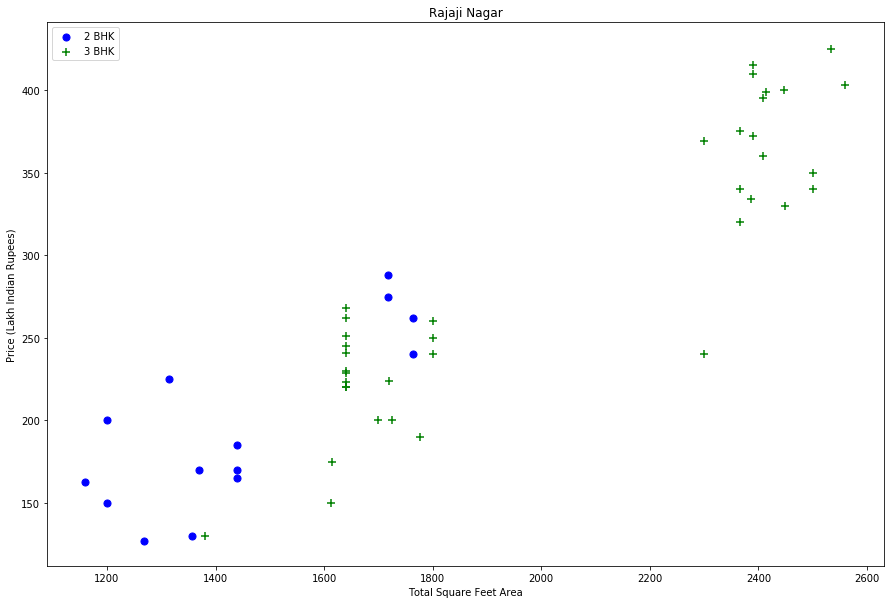

In [67]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")


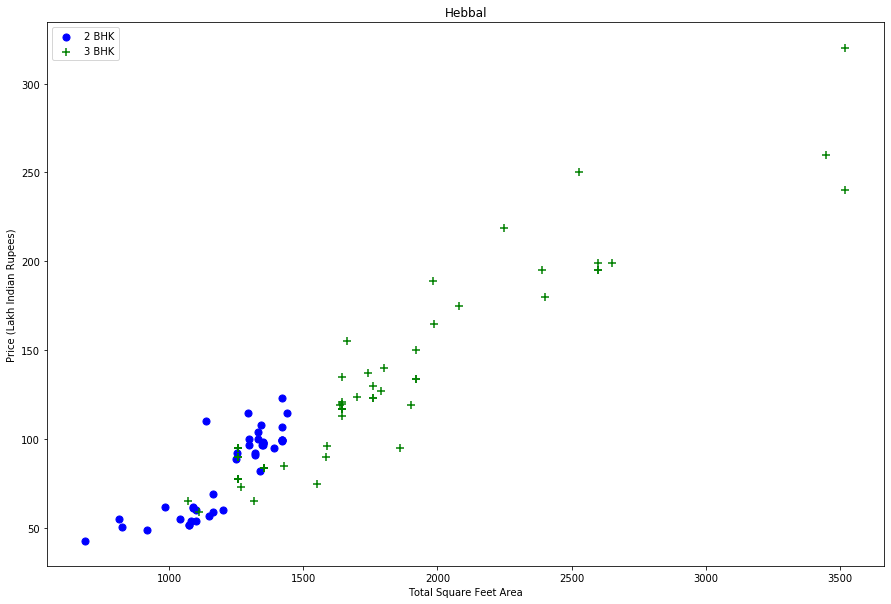

In [68]:
plot_scatter_chart(df,"Hebbal")

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
# df = df.copy()
df.shape


(7317, 7)

In [70]:
df['bath'].value_counts()

2.0     4188
3.0     1763
1.0      568
4.0      501
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

In [71]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [72]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [73]:
df = df[df.bath<df.bhk+2]
df.shape

(7239, 7)

In [74]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [75]:
df.bath.value_counts()

2.0     4188
3.0     1763
1.0      568
4.0      499
5.0      155
6.0       38
7.0       10
8.0        9
9.0        6
13.0       1
12.0       1
16.0       1
Name: bath, dtype: int64

In [76]:
loc = pd.get_dummies(df['location'],drop_first=True)
loc

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df = pd.concat([df,loc],axis=1)

In [78]:
df.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df = df.drop('location', axis=1)
df.shape

(7239, 244)

In [45]:
df = df.drop('other', axis=1)
df.shape

(7239, 243)

In [80]:
df.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=244)

In [81]:
X = df.drop('price',axis=1)

y = df['price']

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train) 

LinearRegression()

In [85]:
linear_pred = linear.predict(X_test)
linear_pred

array([123.68919775,  79.12643295,  76.7573612 , ...,  58.55465139,
        99.4418541 , 135.74127115])

In [86]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(metrics.mean_absolute_error(y_test, linear_pred))
print(metrics.mean_squared_error(y_test, linear_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, linear_pred)))
print(r2_score(y_test, linear_pred))

16.155431156699656
711.0563858518601
26.665640548313483
0.862913224522934


In [88]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [89]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([123.63638888,  78.37002511,  76.03459785, ...,  58.49396785,
        99.02825609, 136.2172509 ])

In [90]:
print(metrics.mean_absolute_error(y_test, ridge_pred))
print(metrics.mean_squared_error(y_test, ridge_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print(r2_score(y_test, ridge_pred))

16.159084961787137
730.7518193666626
27.03242163341388
0.8591160805468868


In [56]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [57]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([100.06642662,  67.31707261,  61.06777512, ...,  64.19242387,
        74.0127485 , 144.88281723])

In [58]:
print(metrics.mean_absolute_error(y_test, lasso_pred))
print(metrics.mean_squared_error(y_test, lasso_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print(r2_score(y_test, lasso_pred))

23.157751000677237
1460.2194454865455
38.21281781662464
0.7184797447099163


In [59]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
dtree_pred = dtree_reg.predict(X_test)

In [61]:
print(metrics.mean_squared_error(y_test, dtree_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))
print(r2_score(y_test, dtree_pred))

1544.9176768102968
39.30544080417235
0.7021505088689731


In [62]:
#Rnadom Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
rf_pred = rf_reg.predict(X_test)

In [64]:
print(metrics.mean_squared_error(y_test, rf_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print(r2_score(y_test, rf_pred))

1147.3475621284654
33.872519276376025
0.7787992896579756


In [65]:
#cross validation to check generalized model among all 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.8248176 , 0.85755733, 0.85341653, 0.8424941 , 0.85170927])

In [66]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linear.predict([x])[0]

In [208]:
predict_price('Electronic City',1200, 3, 3)

67.00324183859345

In [204]:
#Saving the model
import joblib
joblib.dump(linear, open('model.pkl', 'wb'))